<a href="https://colab.research.google.com/github/NikhilWadkar10/hotel/blob/main/Copy_of_AI_ML_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libray function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset loading

In [ ]:
df = pd.read_csv('/content/salaries.csv')
display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M


## Data exploration

In [ ]:
# Data Shape
print(f"DataFrame Shape: {df.shape}")

# Data Types
print("\nData Types:")
print(df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics for Numerical Features:")
display(df.describe())

# Missing Values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Unique Values for Categorical Features
print("\nUnique Values for Categorical Features:")
for column in df.select_dtypes(include=['object']):
  print(f"\nColumn: {column}")
  print(df[column].unique())

DataFrame Shape: (88584, 11)

Data Types:
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Descriptive Statistics for Numerical Features:


,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000



Missing Values per Column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Unique Values for Categorical Features:

Column: experience_level
['MI' 'SE' 'EN' 'EX']

Column: employment_type
['FT' 'CT' 'PT' 'FL']

Column: job_title
['Customer Success Manager' 'Engineer' 'Applied Scientist' 'Data Analyst'
 'Software Development Engineer' 'Research Scientist' 'Data Scientist'
 'Platform Engineer' 'Computational Biologist' 'AI Data Scientist'
 'Admin & Data Analyst' 'Cloud Engineer' 'Data Management Specialist'
 'Data Product Owner' 'Software Engineer' 'Machine Learning Engineer'
 'Associate' 'Data Engineer' 'Product Manager' 'Data Operations Engineer'
 'Business Intelligence Engineer' 'Research Engineer' 'Analytics Engineer'
 'Analyst' 'Actuarial Analyst' 'Manager

## Data cleaning

In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"DataFrame shape after removing duplicates: {df.shape}")

Missing values per column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
DataFrame shape after removing duplicates: (44244, 11)


## Data analysis

Descriptive statistics for Salary in USD:
 count     44244.000000
mean     151313.435788
std       77343.097878
min       15000.000000
25%       96200.000000
50%      139200.000000
75%      190315.000000
max      800000.000000
Name: salary_in_usd, dtype: float64


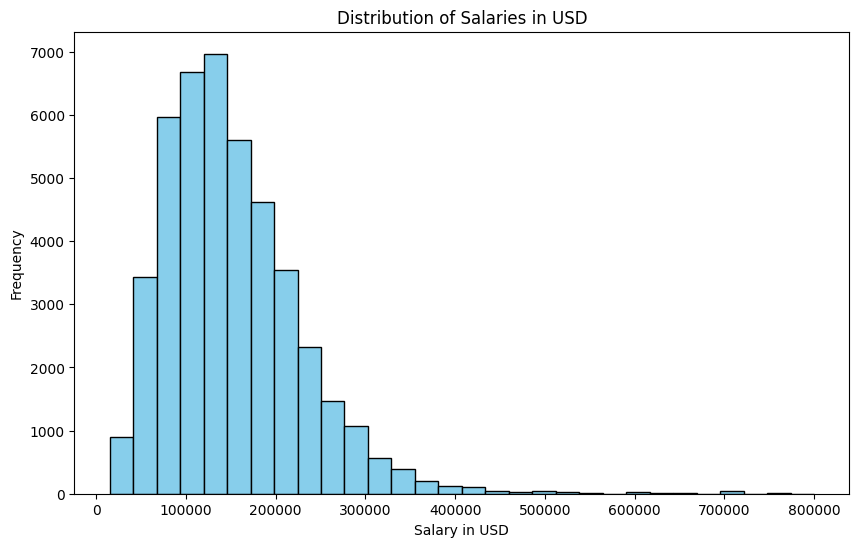

In [ ]:
import matplotlib.pyplot as plt

# Calculate descriptive statistics for salary_in_usd
salary_stats = df['salary_in_usd'].describe()
print("Descriptive statistics for Salary in USD:\n", salary_stats)

# Create a histogram to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries in USD')
plt.show()

Highest Paying Job Title: Analytics Engineering Manager
Lowest Paying Job Title: Analytics Analyst


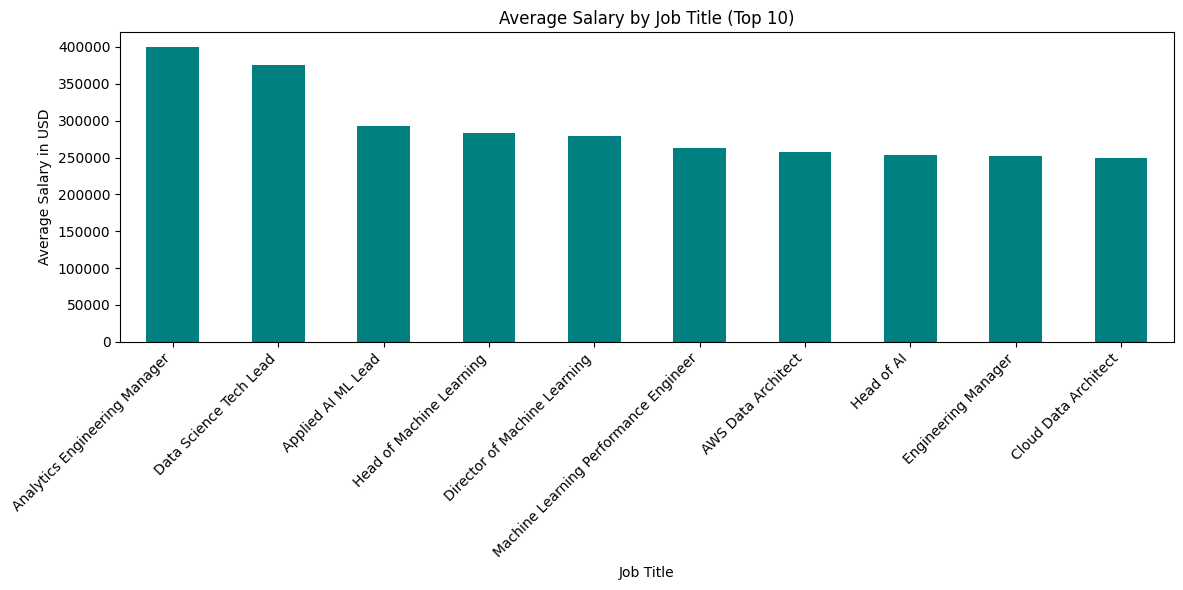

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average salary for each job title
average_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Identify the highest and lowest paying job titles
highest_paying_job = average_salary_by_job.idxmax()
lowest_paying_job = average_salary_by_job.idxmin()

print(f"Highest Paying Job Title: {highest_paying_job}")
print(f"Lowest Paying Job Title: {lowest_paying_job}")

# Visualize the average salary for each job title using a bar chart (for the top 10 jobs)
plt.figure(figsize=(12, 6))
average_salary_by_job[:10].plot(kind='bar', color='teal')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Job Title (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

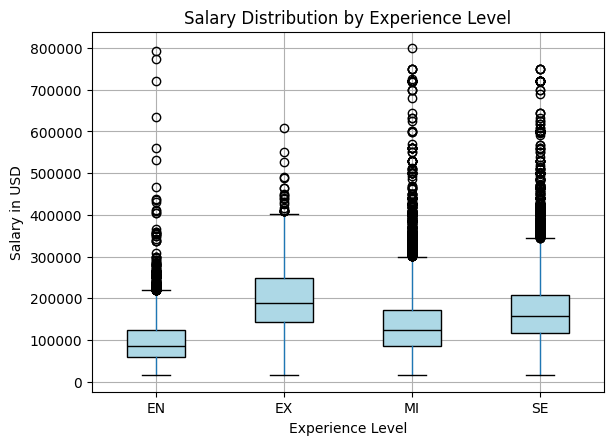

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average salary for each experience level
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Create a box plot to visualize the relationship between salary and experience level
plt.figure(figsize=(10, 6))
df.boxplot(column='salary_in_usd', by='experience_level', patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary in USD')
plt.xlabel('Experience Level')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.show()

<Figure size 1000x600 with 0 Axes>

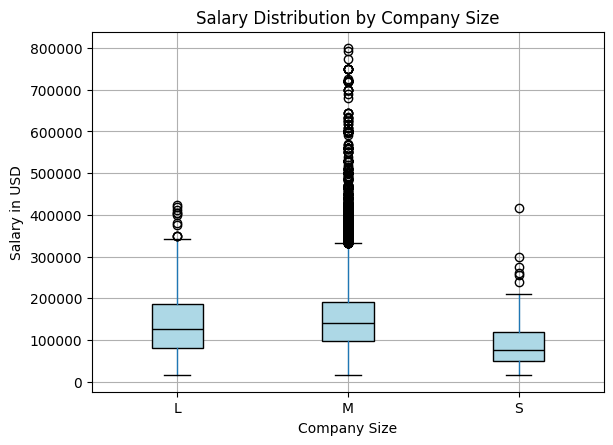

In [ ]:
import matplotlib.pyplot as plt

# Calculate the average salary for each company size category
average_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean()

# Create a box plot to visualize the relationship between salary and company size
plt.figure(figsize=(10, 6))
df.boxplot(column='salary_in_usd', by='company_size', patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title('Salary Distribution by Company Size')
plt.ylabel('Salary in USD')
plt.xlabel('Company Size')
plt.suptitle('')  # Remove the default title generated by boxplot
plt.show()

Explore the correlation between salary and other variables like 'remote_ratio' or 'company_location' by calculating the correlation matrix and visualizing the relationships using a scatter plot.

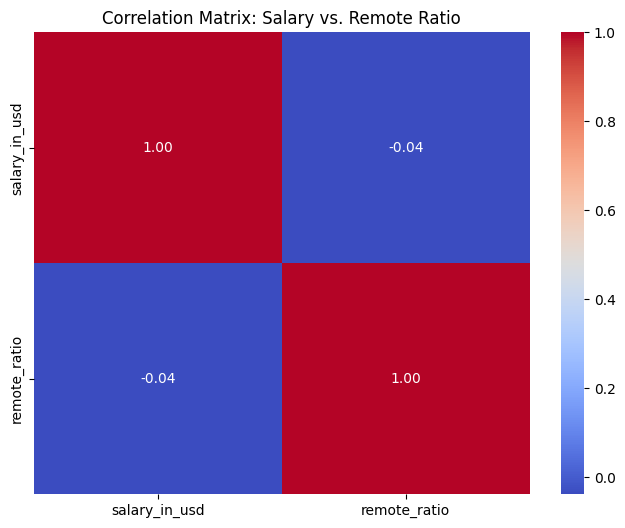

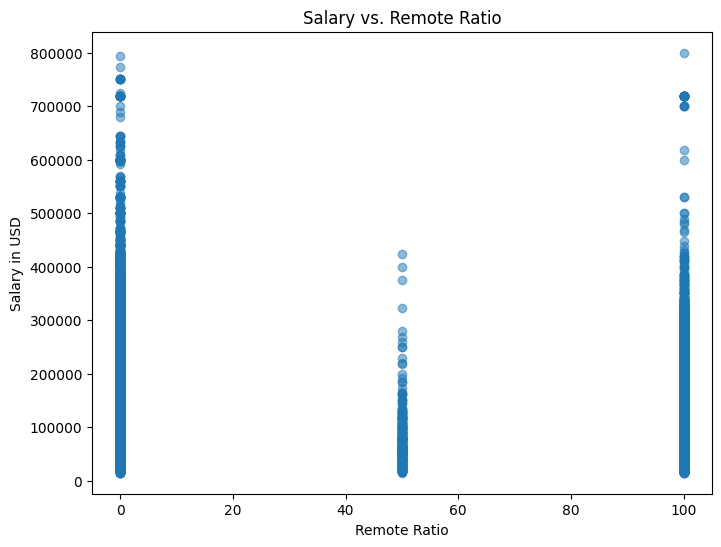

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['salary_in_usd', 'remote_ratio']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Salary vs. Remote Ratio')
plt.show()

# Scatter plot for salary vs. remote ratio
plt.figure(figsize=(8, 6))
plt.scatter(df['remote_ratio'], df['salary_in_usd'], alpha=0.5)
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.title('Salary vs. Remote Ratio')
plt.show()

## Data visualization

Create a histogram to visualize the distribution of salaries, a bar chart to show average salary for each job title, box plots to compare salary distributions across different categories, and a scatter plot to visualize the relationship between salary and remote ratio.


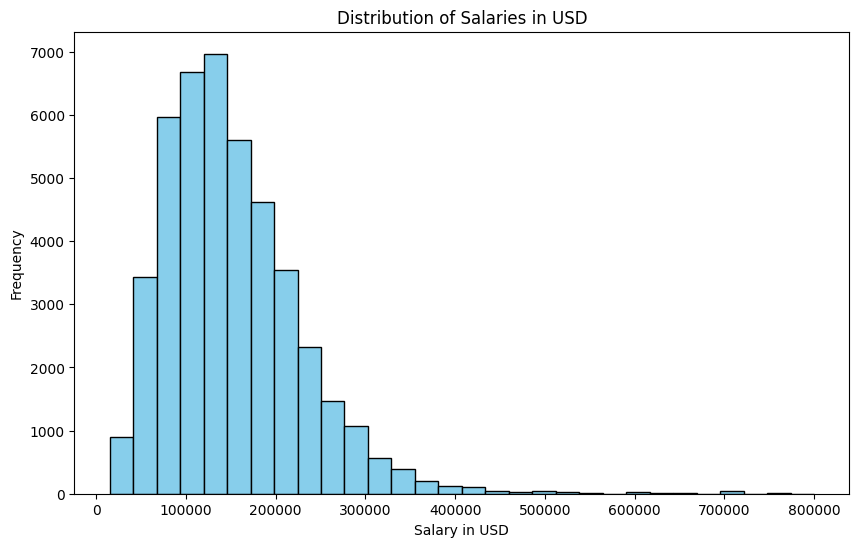

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Salary Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries in USD')
plt.show()

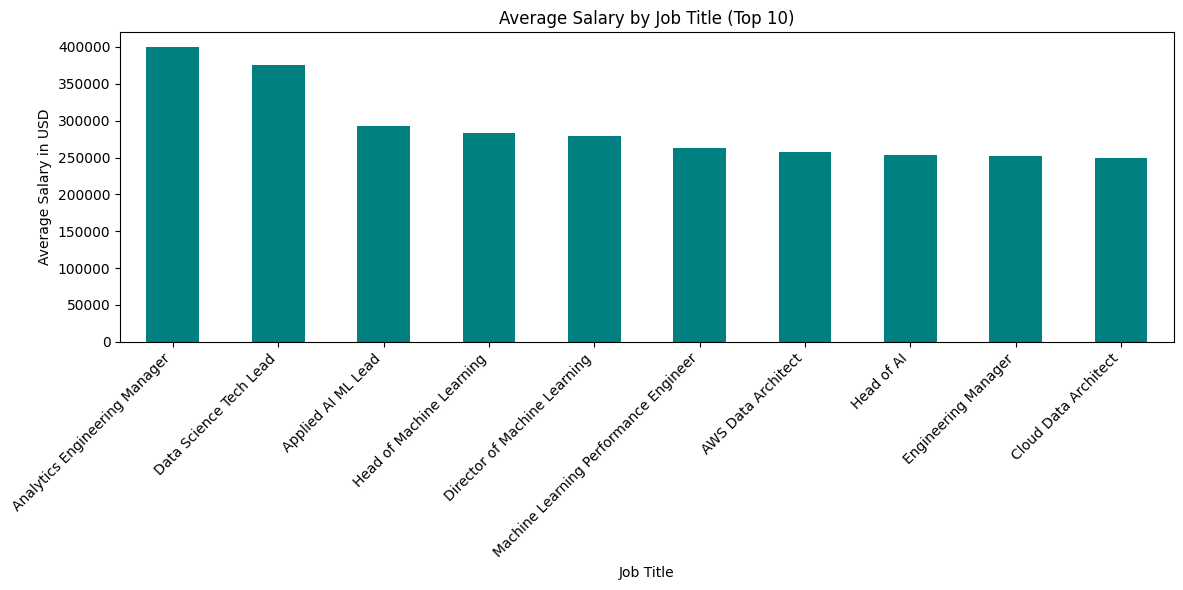

In [ ]:
# 2. Bar Chart of Average Salary by Job Title (Top 10)
average_salary_by_job = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
average_salary_by_job[:10].plot(kind='bar', color='teal')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.title('Average Salary by Job Title (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

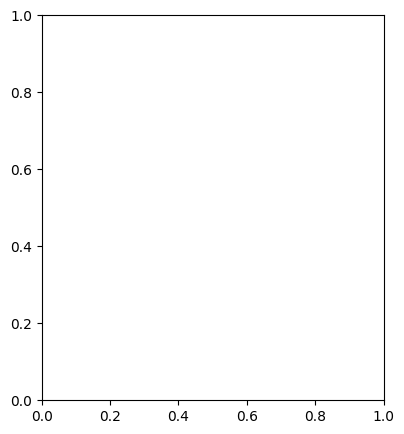

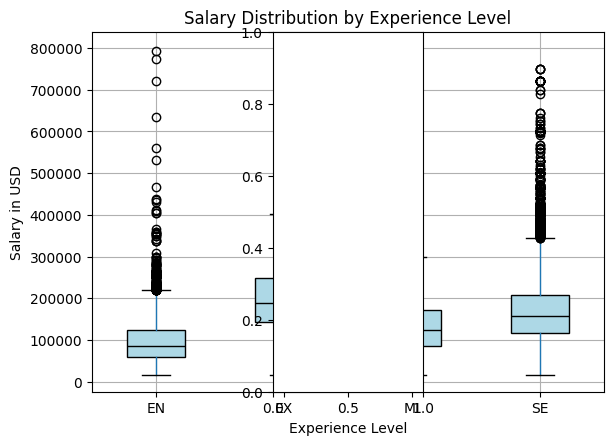

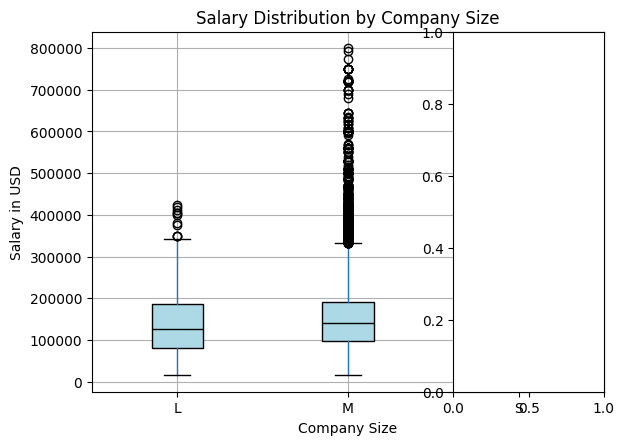

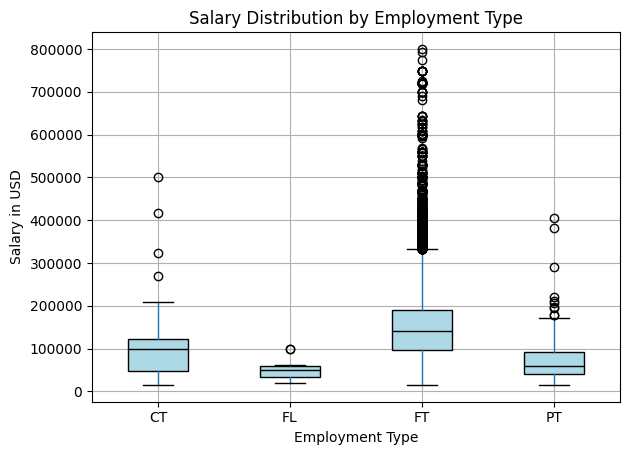

In [ ]:
# 3. Box Plots for Salary Distribution Across Different Categories
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
df.boxplot(column='salary_in_usd', by='experience_level', patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title('Salary Distribution by Experience Level')
plt.ylabel('Salary in USD')
plt.xlabel('Experience Level')
plt.suptitle('')

plt.subplot(1, 3, 2)
df.boxplot(column='salary_in_usd', by='company_size', patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title('Salary Distribution by Company Size')
plt.ylabel('Salary in USD')
plt.xlabel('Company Size')
plt.suptitle('')

plt.subplot(1, 3, 3)
df.boxplot(column='salary_in_usd', by='employment_type', patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='black'))
plt.title('Salary Distribution by Employment Type')
plt.ylabel('Salary in USD')
plt.xlabel('Employment Type')
plt.suptitle('')

plt.tight_layout()
plt.show()

## conclusion


The Exploratory Data Analysis (EDA) provided valuable insights into the Salaries dataset. Key findings include the distribution of salaries, the relationship between salary and various factors like job title, experience level, company size, and remote work arrangements.The salary distribution is right-skewed, with a higher concentration of salaries in the lower to mid-range and some outliers in the higher range.
The average salary is around $151,313 USD, while the median salary is $$151,313 USD, while the median salary is $139,200 USD.Analytics Engineering Manager" has the highest average salary, while "Analytics Analyst" has the lowest.
Salaries generally increase with higher experience levels, with "Executive-level" having the highest median salary.Larger companies potentially offer higher salaries compared to smaller companies.
There is a weak or no significant correlation between salary and remote work arrangements.Investigate the impact of company location on salary to identify potential regional variations in pay.
Develop a predictive model to estimate salary based on factors like job title, experience level, company size, and location, which can be useful for employers and job seekers.